$\color{green}{\text{This notebook is best viewed in jupyter notebook}}$

## Linear Regression

_Linear regression_, as the name implies, finds the _best fit line_ (in high-dimensional spaces, plane/hyperplane) between the _independent_ and _dependent_ variable (i.e., input data and target output). Recall that we approach the univariate linear regression in the class first and build up our way to multi-variate input/output forms. Univariate linear regression describes the situation where only one independent variable is presented (i.e., $x \in \mathbb{R}$) and the model has to find the linear relationship of it with the dependent variable (i.e., $y$). In the multivariate form, we have more than one independent variable (i.e., $\boldsymbol{x} \in \mathbb{R}^n$) and the model may have multiple outputs to predict (i.e., $\boldsymbol{y} \in \mathbb{R}^p$). <br> 
If you want to have a quick wrap-up, check the following Wikipedia article:
[Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)

<!-- <p float="left">
    <img src="img/linear_regression_s.png" alt="LR_s" width="49%"/>
    <img src="img/linear_regression_m.png" alt="LR_m" width="49%"/> 
</p> -->
<p float="center">
    <img src="img/linear_regression_both.png" alt="LR_s" width="100%"/>
    <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  <em>Simple Linear Regression</em>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  <em>Multiple Linear Regression</em>
</p>

As shown in the figure, linear regression can be understood as finding the _best-fitting straight line_ (or _plane_ in multidimensional cases) through the training examples. This best-fitting line is also called the **regression line**, and the vertical lines from the regression line to the training examples are the so-called **offsets** or **residuals** — the errors of our prediction.


In [1]:
# As always, we first import several libraries that will be helpful to solve the tasks
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

**Loading the data**

In [2]:
# === Task1 ===
# Alcohol data: task1_alc.npy
# BMI data:     task1_bmi.npy
# GDP data:     task1_gdp.npy
# Life expect.: task1_lifeexpt.npy

# Load data from drive
# Shape of all data -> (73,1); m -> 73; n -> 1
alcoholData = np.load("data/task1_alc.npy")
bmiData = np.load("data/task1_bmi.npy")
gdpData = np.load("data/task1_gdp.npy")
lifeExpectData = np.load("data/task1_lifeexpt.npy")

#### 1. Regression function

In [3]:
def linearRegression_cof(X, Y):
    bias = np.ones(alcoholData.shape)
    X = np.append(bias,X,axis=1)
    coeff1 = np.matmul(np.transpose(X),X)
    coeff2 = np.matmul(np.transpose(X),Y)
    W = np.matmul(np.linalg.inv(coeff1),coeff2)
    return W

#### 2. Obtaining regression coefficients for _Alcohol_

In [4]:
# Obtain coefficients
W_alcohol = linearRegression_cof(alcoholData,lifeExpectData)

# Print coefficients:
print(f"w[0] = {W_alcohol[0]} | w[1] = {W_alcohol[1]}")

w[0] = [63.13011473] | w[1] = [0.96682896]


#### 3. Obtaining regression coefficients for _BMI_

In [5]:
# Obtain coefficients
W_BMI = linearRegression_cof(bmiData,lifeExpectData)

# Print coefficients:
print(f"w[0] = {W_BMI[0]} | w[1] = {W_BMI[1]}")

w[0] = [60.74884974] | w[1] = [0.19073734]


#### 4. & 5. Predicting the Life Expectancy

Write a function **predict()**, which takes a data point $\boldsymbol{x}_q$ and coefficients $\boldsymbol{w}$ and return the prediction $\hat{y} = \boldsymbol{w}^\top \boldsymbol{x}_q$.

In [6]:
def predict(X, w):
    bias = np.ones((X.shape[0],1))
    X = np.append(bias,X, axis=1)
    
    return np.matmul(X,w)

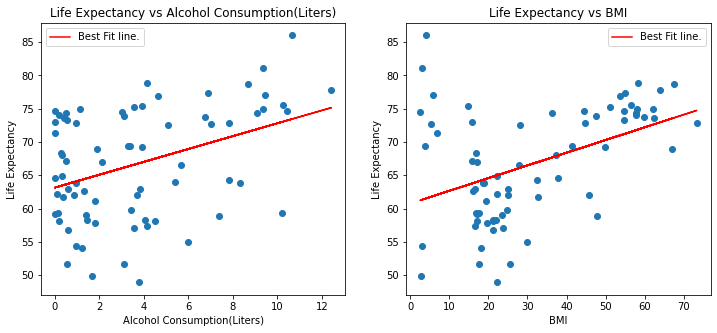

In [7]:
#Display the scatter results as well as the best-fit line (Scatter data and line in the same plot to see the 'fit' quality) 
# i.e. one (sub)plot for Alcohol, one (sub)plot for BMI

x_label = ["Alcohol Consumption(Liters)", "BMI"]
W = [W_alcohol, W_BMI]
X = [alcoholData, bmiData]
plt.figure(figsize=(12,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    y_predict = predict(X[i],W[i])
    plt.scatter(X[i],lifeExpectData)
    plt.plot(X[i],y_predict,color="r",label=f"Best Fit line.")
    plt.xlabel(x_label[i])
    plt.ylabel("Life Expectancy")
    plt.title(f"Life Expectancy vs {x_label[i]}")
    plt.legend()

#### 6. Data interpretation

#### 1. Obtaining coefficients for multiple linear regression (on training data from Task 1)

In [9]:
# Obtain coefficients
X_half = np.append(bmiData, alcoholData, axis=1)
dataAll= np.append(X_half, gdpData, axis=1)

W_multi = linearRegression_cof(dataAll,lifeExpectData)
# Print coefficients:
print(f"w[0] = {W_multi[0][0]} | w[1] = {W_multi[1][0]} | w[2] = {W_multi[2][0]} | w[3] = {W_multi[3][0]}")

[[1.72000000e+01 1.00000000e-02 6.35372310e+01]
 [6.20000000e+01 9.34000000e+00 2.50000000e+00]
 [1.58000000e+01 1.00000000e-02 8.35789341e+02]
 [2.35000000e+01 1.40000000e+00 8.25942785e+02]
 [4.99000000e+01 3.93000000e+00 1.20000000e+00]
 [5.37000000e+01 4.64000000e+00 5.51568340e+01]
 [1.71000000e+01 4.51000000e+00 6.66842783e+02]
 [1.66000000e+01 4.16000000e+00 2.64799730e+01]
 [2.56000000e+01 3.13000000e+00 6.10000000e+00]
 [2.82000000e+01 5.07000000e+00 3.67429453e+02]
 [1.70000000e+01 2.12000000e+00 8.82491462e+02]
 [2.70000000e+00 1.66000000e+00 4.94336779e+02]
 [1.75000000e+01 5.60000000e-01 9.89236363e+02]
 [2.21000000e+01 1.20000000e-01 8.29758688e+02]
 [2.50000000e+01 3.82000000e+00 8.00000000e+00]
 [5.84000000e+01 4.14000000e+00 6.75924360e+02]
 [6.40000000e+01 1.24300000e+01 1.90000000e+00]
 [3.80000000e+00 3.39000000e+00 5.20000000e+00]
 [1.96000000e+01 1.82000000e+00 1.20000000e+00]
 [3.27000000e+01 3.90000000e-01 1.43986898e+02]
 [5.78000000e+01 2.20000000e-01 2.900000

#### 2. Computing the Error to evaluate the performance of the linear regression models

In [ ]:
#Compute the sum squared error
def compute_sse(y_estimate, y): 

    return np.sum((y_estimate-y)**2)

#### 3. Evaluating on unseen test data

In [ ]:
# Load the test data for this task: Australia, year 2002
# Test BMI data:     task2_AU2002_test_bmi.npy
# Test Alcohol data: task2_AU2002_test_alc.npy
# Test GDP data:     task2_AU2002_test_gdp.npy
# Test Life expect.: task2_AU2002_test_lifeexpt.npy

# Important: Be careful NOT to confuse your training and test data! 
# Training data is for fitting the model, test data for evaluation only!

# Load the test data from drive
testBMIData = np.reshape(np.load("data/task2_AU2002_test_bmi.npy"),(1,1))
testAlcoholData = np.reshape(np.load("data/task2_AU2002_test_alc.npy"),(1,1))
testGDPData = np.reshape(np.load("data/task2_AU2002_test_gdp.npy"),(1,1))
testLifeExpect = np.reshape(np.load("data/task2_AU2002_test_lifeexpt.npy"),(1,1))

testData = np.array([[testBMIData[0,0], testAlcoholData[0,0], testGDPData[0,0]]])

#Our data trained on train data, from task 1. We take trained weights and test with unseen data.

##### a) $L_{\text{SE}}$ when trained on $X=$ 'BMI'  (Coeficients from Task 1)

In [ ]:
# Compute L_SSE
y_predict = predict(testAlcoholData,W_alcohol)
loss = compute_sse(testLifeExpect,y_predict)

# Print L_SSE
print(loss)

##### b) $L_{\text{SE}}$ when trained on $X_1=$ 'BMI', $X_2=$ 'Alcohol' and $X_3=$ 'GDP'    (Coeficients from Task 1)

In [ ]:
# Compute L_SSE
y_predict = predict(testData,W_multi)
loss = compute_sse(testLifeExpect,y_predict)

# Print L_SSE
print(loss)

#### 1. Loading and displaying data

In [ ]:
# === Task3 ===
# Training set: Original images:    train_face_clean.npy
# Training set: Corrupted images:   train_face_crpt.npy
# Test set: Original images:        test_face_clean.npy
# Test set: Corrupted images:       test_face_crpt.npy

# Load data from drive


# Lets see what the corrupted training data looks like
# --> Visualise image[5] of the corrupted train and image[8] of the corrupted test set (feel free to check others as well)
train_clean = np.load("data/train_face_clean.npy") # 185 Images -> 62x47
train_corrupt = np.load("data/train_face_crpt.npy") # 185 Images -> 62x47
test_clean = np.load("data/test_face_clean.npy") # 88 Images -> 62x47
test_corrupt = np.load("data/test_face_crpt.npy") # 88 Images -> 62x47
plt.subplot(1,2,1)
plt.imshow(train_corrupt[5],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(test_corrupt[8],cmap='gray')

#### 2. Fitting the regression model / Determining the parameters

In [ ]:
# Implement regression_fit() 
def regression_fit(samples_X, samples_Y):
    # input arguments: 
    #    samples_X: training samples
    #    samples_Y: training 'labels' (uncorrupted/clean samples)
    # output:
    #    reg_cof: regression coefficients (parameters)
    
    reg_cof = np.matmul(np.linalg.pinv(samples_X),samples_Y)

    return reg_cof

In [ ]:
# Retrieve the regression parameters
train_clean_reshape = np.reshape(train_clean,(train_clean.shape[0],(train_clean.shape[1]*train_clean.shape[2])))
train_corrupt_reshape = np.reshape(train_corrupt,(train_corrupt.shape[0],(train_corrupt.shape[1]*train_corrupt.shape[2])))
reg_cof = regression_fit(train_corrupt_reshape,train_clean_reshape)

#### 3. Completing the corrupted images of the unseen test data by using linear regression to predict the missing pixels

In [ ]:
# Predict the missing pixels for all test images
def predict_2(samples, reg_cof):
    # input arguments: 
    #    samples: np.array with image data, shape (N, h, w)
    #    reg_cof: regression coefficients / parameters
    # output:
    #    rest_samples: restored samples -- np.array with image data, shape (N, h, w)
    shape = samples.shape
    samples = np.reshape(samples,(samples.shape[0],(samples.shape[1]*samples.shape[2])))
    product = np.matmul(samples,reg_cof)
    rest_samples = np.reshape(product,(shape))
    
    return rest_samples

In [ ]:
# Predict / Restore images of the test set
reconstructedImages_test = predict_2(test_corrupt, reg_cof)
# Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
# (Side-by-side plot of all three images: 'Clean test img', 'Corrupted test img', 'Restored test img')
i = 8
plt.subplot(1,3,1)
plt.title("Test Clean")
plt.imshow(test_clean[i],cmap='gray')
plt.subplot(1,3,2)
plt.title("Test Corrupted")
plt.imshow(test_corrupt[i],cmap='gray')
plt.subplot(1,3,3)
plt.title("Restored Test Image")
plt.imshow(reconstructedImages_test[i],cmap='gray')

#### 4. Completing the corrupted training images via linear regression

In [ ]:
# Predict / Restore images of the training set
reconstructedImages_train = predict_2(train_corrupt, reg_cof)

# Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
# (Side-by-side plot of all three images: 'Clean train img', 'Corrupted train img', 'Restored train img')
i = 5
plt.subplot(1,3,1)
plt.title("Train Clean")
plt.imshow(train_clean[i],cmap='gray')
plt.subplot(1,3,2)
plt.title("Train Corrupted")
plt.imshow(train_corrupt[i],cmap='gray')
plt.subplot(1,3,3)
plt.title("Restored Test Image")
plt.imshow(reconstructedImages_train[i],cmap='gray')


#### 1. PSNR Implementation

In [ ]:
## Implement PSNR to measure quantitative difference
def PSNR(img1, img2):
    # img1 = clean data / I - noise free Image
    # img2 = corrupted data / K - noisy approximation.
    mse = (np.sum(np.sum((img1 - img2)**2))) / (img1.shape[0] * img1.shape[1])
    psnr = 20 * np.log10(255) - 10 * np.log10(mse)
    return psnr

#### 2. Calculate the PSNR for the 9th test image (i.e., image[8]) from Task 3: corrupted image and restored version

In [ ]:
# Compute and print the PSNR values for the 9th test image: Both for corrupted 'raw' version and restored version
psnr_1 = PSNR(test_clean[8],reconstructedImages_test[8])
psnr_2 = PSNR(test_clean[8],test_corrupt[8])
print(f"PSNR for Restored Image = {psnr_1} dB | PSNR for Corrupted Image = {psnr_2} dB")


#### 3. Load new data corrupted with random patterns


In [ ]:
# Load data from drive
# Train images corrupted with random pattern: train_face_crpt_rdm.npy
# Test  images corrupted with random pattern: test_face_crpt_rdm.npy
rmd_train_corrupt = np.load("data/train_face_crpt_rdm.npy")
rmd_test_corrupt = np.load("data/test_face_crpt_rdm.npy")
rmd_train_corrupt_RESHAPE = np.reshape(rmd_train_corrupt,(rmd_train_corrupt.shape[0],(rmd_train_corrupt.shape[1]*rmd_train_corrupt.shape[2])))
rmd_test_corrupt_RESHAPE = np.reshape(rmd_test_corrupt,(rmd_test_corrupt.shape[0],(rmd_test_corrupt.shape[1]*rmd_test_corrupt.shape[2])))
# Lets see what the corrupted training data looks like
# --> Visualise image[5] of the corrupted train and image[8] of the corrupted test set (but feel free to check others as well)
plt.subplot(1,2,1)
plt.title("Corrupt Train")
plt.imshow(rmd_train_corrupt[5],cmap='gray')
plt.subplot(1,2,2)
plt.title("Corrupt Test")
plt.imshow(rmd_test_corrupt[8],cmap='gray')

#### 4. Repeat regression fit and prediction on new data

In [ ]:
# Retrieve the regression coefficients to reconstruct images from corrupted ones
reg_cof = regression_fit(rmd_train_corrupt_RESHAPE,train_clean_reshape)

In [ ]:
# Restore all corrupted test images
reconstructedImages_task4 = predict_2(rmd_test_corrupt,reg_cof)

In [ ]:
# Display the results on the randomly corrupted test image[8]: Compare 'clean', 'corrupted' and 'restored'
i = 8
plt.subplot(1,3,1)
plt.title("Clean")
plt.imshow(test_clean[i],cmap='gray')
plt.subplot(1,3,2)
plt.title("Corrupted")
plt.imshow(rmd_test_corrupt[i],cmap='gray')
plt.subplot(1,3,3)
plt.title("Restored")
plt.imshow(reconstructedImages_task4[i],cmap='gray')

#### 5. Calculate the PSNR for the 9th test image (i.e., image[8]): corrupted image and restored version

In [ ]:
# Compute and print the PSNR values for the 9th test image (random corruption pattern): 
# Both for corrupted 'raw' version and restored version
psnr_1 = PSNR(test_clean[8],reconstructedImages_test[8])
psnr_2 = PSNR(test_clean[8],rmd_test_corrupt[8])

print(f"PSNR for Restored Image = {psnr_1} dB | PSNR for Corrupted Image = {psnr_2} dB")
